# <u>Training Exercices - Time Series: Motivation<u>

__<u>Jorge Pineño Pérez<u>__ / Module 7 - Time Series

In [40]:
# package imports
install.packages("readxl")
install.packages("dplyr")
library(readxl)
library(dplyr)

Warning message:
"package 'readxl' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"


__<u>Training Exercise 6.1<u>__

In [41]:
# import the dataframe
random <- read_excel('TrainExer61.xlsx')
head(random)

EPSX,EPSY,X,Y
<dbl>,<dbl>,<dbl>,<dbl>
-2.4472315,-1.4218348,0.000000,0.0000000
-1.5404713,-0.6321228,-1.540471,-0.6321228
1.2849123,-1.9971816,-0.255559,-2.6293044
-0.8544949,0.1745875,-1.110054,-2.4547169
0.9598599,-2.0871108,-0.150194,-4.5418278
-2.3164001,1.0489761,-2.466594,-3.4928517


In [42]:
# add a "t" column to the tibble
random <- random %>% mutate(t = row_number() - 1)
head(random)

EPSX,EPSY,X,Y,t
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2.4472315,-1.4218348,0.000000,0.0000000,0
-1.5404713,-0.6321228,-1.540471,-0.6321228,1
1.2849123,-1.9971816,-0.255559,-2.6293044,2
-0.8544949,0.1745875,-1.110054,-2.4547169,3
0.9598599,-2.0871108,-0.150194,-4.5418278,4
-2.3164001,1.0489761,-2.466594,-3.4928517,5


__(a)__

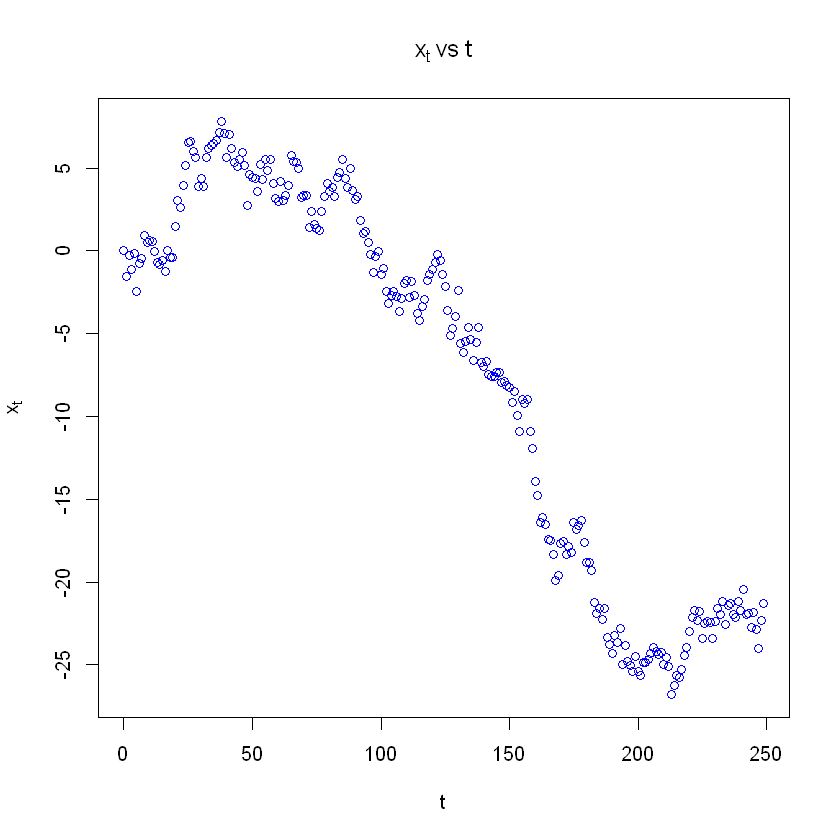

In [43]:
# plot x_t against time t
plot(random[['t']], random[['X']], col='blue',
     main=expression(x[t] ~ "vs" ~ t),
     xlab=expression(t),
     ylab=expression(x[t]))

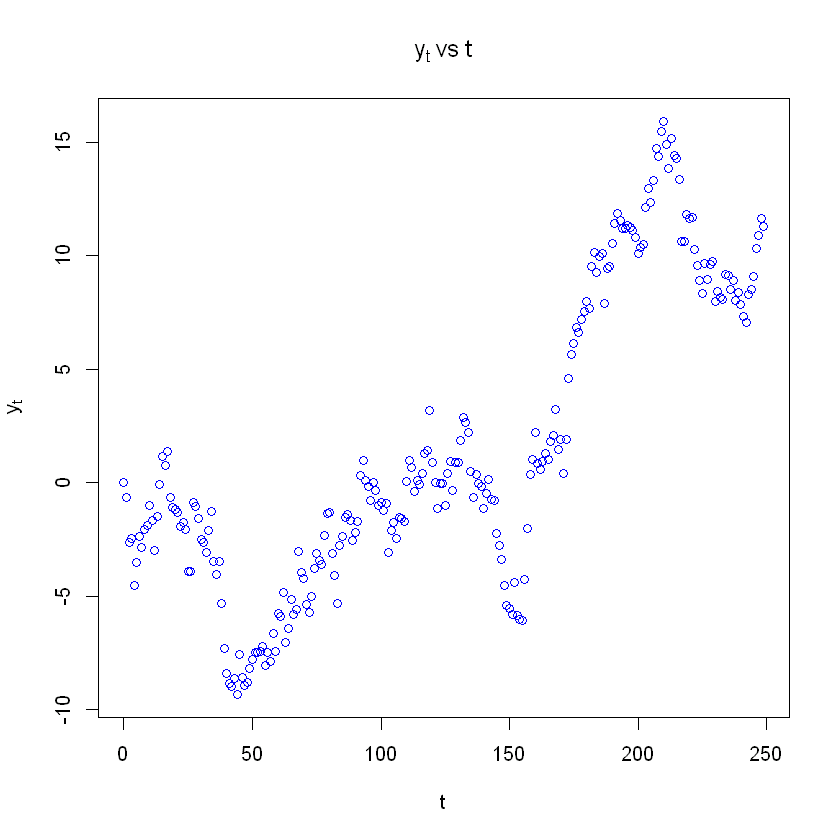

In [44]:
# plot y_t against time t
plot(random[['t']], random[['Y']], col='blue',
     main=expression(y[t] ~ "vs" ~ t),
     xlab=expression(t),
     ylab=expression(y[t]))

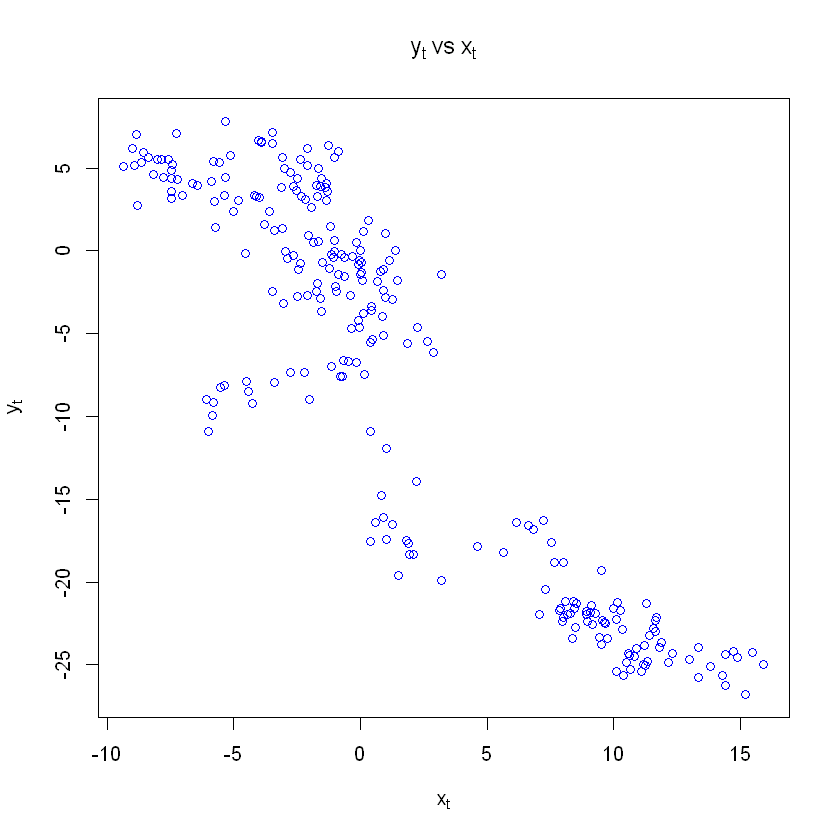

In [45]:
# plot y_t against x_t
plot(random[['Y']], random[['X']], col='blue',
     main=expression(y[t] ~ "vs" ~ x[t]),
     xlab=expression(x[t]),
     ylab=expression(y[t]))

__(b)__

In [46]:
# regress "EPSY" on a constant and "EPSX", and check
# the t and p-values of the slope coefficient
noise_reg <- lm(EPSY ~ EPSX, data=random)
summary(noise_reg)


Call:
lm(formula = EPSY ~ EPSX, data = random)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.69468 -0.67538 -0.01086  0.66839  2.93055 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.03119    0.06446   0.484    0.629
EPSX        -0.08791    0.06672  -1.318    0.189

Residual standard error: 1.014 on 248 degrees of freedom
Multiple R-squared:  0.006953,	Adjusted R-squared:  0.002949 
F-statistic: 1.736 on 1 and 248 DF,  p-value: 0.1888


__(c)__

In [47]:
# add 3 lagged values for "EPSY" and "EPSX" to our tibble
random <- random %>% mutate(EPSY_1=lag(EPSY), EPSY_2=lag(EPSY_1), EPSY_3=lag(EPSY_2),
                           EPSX_1=lag(EPSX), EPSX_2=lag(EPSX_1), EPSX_3=lag(EPSX_2))
head(random)

EPSX,EPSY,X,Y,t,EPSY_1,EPSY_2,EPSY_3,EPSX_1,EPSX_2,EPSX_3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-2.4472315,-1.4218348,0.000000,0.0000000,0,NA,NA,NA,NA,NA,NA
-1.5404713,-0.6321228,-1.540471,-0.6321228,1,-1.4218348,NA,NA,-2.4472315,NA,NA
1.2849123,-1.9971816,-0.255559,-2.6293044,2,-0.6321228,-1.4218348,NA,-1.5404713,-2.4472315,NA
-0.8544949,0.1745875,-1.110054,-2.4547169,3,-1.9971816,-0.6321228,-1.4218348,1.2849123,-1.5404713,-2.447232
0.9598599,-2.0871108,-0.150194,-4.5418278,4,0.1745875,-1.9971816,-0.6321228,-0.8544949,1.2849123,-1.540471
-2.3164001,1.0489761,-2.466594,-3.4928517,5,-2.0871108,0.1745875,-1.9971816,0.9598599,-0.8544949,1.284912


In [48]:
# regress "EPSY" on a constant, "EPSX", and 3 lagged values
# of "EPSY" and "EPSX", and check the F-statistic
noise_reg_lag <- lm(EPSY ~ EPSX + EPSY_1 + EPSY_2 + EPSY_3 + EPSX_1 + EPSX_2 + EPSX_3, data=random)
summary(noise_reg_lag)


Call:
lm(formula = EPSY ~ EPSX + EPSY_1 + EPSY_2 + EPSY_3 + EPSX_1 + 
    EPSX_2 + EPSX_3, data = random)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6912 -0.6563 -0.0319  0.6930  2.9320 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.046154   0.066095   0.698    0.486
EPSX        -0.097274   0.069233  -1.405    0.161
EPSY_1       0.024786   0.064125   0.387    0.699
EPSY_2      -0.015816   0.064698  -0.244    0.807
EPSY_3      -0.047213   0.064340  -0.734    0.464
EPSX_1       0.019901   0.070094   0.284    0.777
EPSX_2      -0.059641   0.069598  -0.857    0.392
EPSX_3       0.009456   0.068390   0.138    0.890

Residual standard error: 1.015 on 239 degrees of freedom
  (3 observations deleted due to missingness)
Multiple R-squared:  0.01573,	Adjusted R-squared:  -0.0131 
F-statistic: 0.5457 on 7 and 239 DF,  p-value: 0.7992


__(d)__

In [49]:
# regress "Y" on a constant and "X", and check the t and
# p-value of the slope coefficient
yx_reg <- lm(Y ~ X, data=random)
summary(yx_reg)


Call:
lm(formula = Y ~ X, data = random)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1194 -1.3637  0.4289  1.9913  5.5454 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.48665    0.21425  -11.61   <2e-16 ***
X           -0.51494    0.01559  -33.02   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.792 on 248 degrees of freedom
Multiple R-squared:  0.8147,	Adjusted R-squared:  0.814 
F-statistic:  1091 on 1 and 248 DF,  p-value: < 2.2e-16


__(e)__

In [51]:
# create a tibble with the residuals of the regression in (d)
# and its one-period lagged value
resid_d <- tibble(
  e = resid(yx_reg),
  e_1 = lag(e)
)
head(resid_d)

e,e_1
<dbl>,<dbl>
2.4866496,NA
1.0612751,2.4866496
-0.2742526,1.0612751
-0.5396795,-0.2742526
-2.1325192,-0.5396795
-2.2763522,-2.1325192


In [53]:
# regress the residuals of the regression in (d) on a constant
# and the one-period lagged residual, knowing that, if the p-value of
# the slope coefficient is very small, residuals are strongly correlated
e_lag <- lm(e ~ e_1, data=resid_d)
summary(e_lag)


Call:
lm(formula = e ~ e_1, data = resid_d)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.64297 -0.77036  0.02107  0.74356  2.83587 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0005562  0.0673863   0.008    0.993    
e_1         0.9251405  0.0242365  38.171   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.063 on 247 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8551,	Adjusted R-squared:  0.8545 
F-statistic:  1457 on 1 and 247 DF,  p-value: < 2.2e-16
